In [ ]:
import pandas as pd
from sklearn import datasets

dataset = datasets.fetch_california_housing()
df = pd.DataFrame(dataset.data, columns = dataset.feature_names)
df['target'] = dataset.target
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

' 박스 중간에 그려진 세로 선을 수염이라고 부르는데, 각 수염을 기준으로 사분위의 값을 표현한다고 볼 수 있다.\n또한, 수염 양 극단에 그려진 가로선이 극단치의 경계가 되며, 이 값을 넘어간 것은 모두 이상치로서 매우 큰 값을 가진다고 해석하면 된다.\n그 측면에서 인구 데이터는 굉장히 많은 극단치를 가지고 있지만, 인구 자체는 불가능한 이상치는 아니기 때문에 \n적절한 가중치를 부여하여 전체 데이터 경향에 미치는 영향을 줄여줄 필요가 있다.'

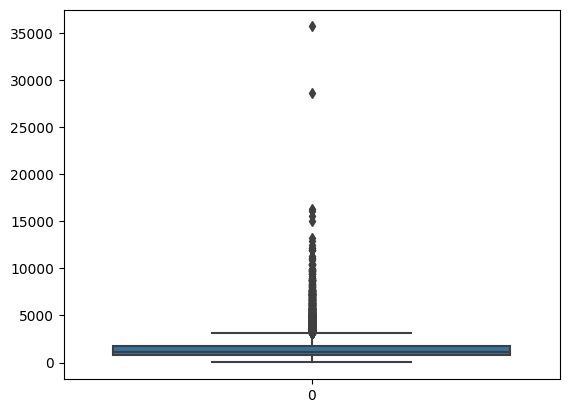

In [ ]:
sns.boxplot(df.Population)#population 변수를 가지고 이상치 분석 작업 실시
""" 박스 중간에 그려진 세로 선을 수염이라고 부르는데, 각 수염을 기준으로 사분위의 값을 표현한다고 볼 수 있다.
또한, 수염 양 극단에 그려진 가로선이 극단치의 경계가 되며, 이 값을 넘어간 것은 모두 이상치로서 매우 큰 값을 가진다고 해석하면 된다.
그 측면에서 인구 데이터는 굉장히 많은 극단치를 가지고 있지만, 인구 자체는 불가능한 이상치는 아니기 때문에
적절한 가중치를 부여하여 전체 데이터 경향에 미치는 영향을 줄여줄 필요가 있다."""

In [ ]:
df.Population.describe()#v평균에 비해 굉장히 동떨어진 최댓값이 나오는 것을 알 수 있다.

count    20640.000000
mean      1425.476744
std       1132.462122
min          3.000000
25%        787.000000
50%       1166.000000
75%       1725.000000
max      35682.000000
Name: Population, dtype: float64

In [ ]:
np.argmax(df['Population'])

15360

In [ ]:
df.iloc[15360]

MedInc            2.572900
HouseAge         14.000000
AveRooms          5.270497
AveBedrms         1.010484
Population    35682.000000
AveOccup          7.482072
Latitude         33.350000
Longitude      -117.420000
target            1.344000
Name: 15360, dtype: float64

In [ ]:
df_sp = df[['AveRooms', 'HouseAge','Population','AveOccup','target']]
"""변수의 경우, 임의로 인구 수와 연관이 많을 것 같은 변수들로 골라서 새로운 df를 구성하였다.
만약 개별 변수의 연관성이 높다면, population의 이상치가 들어있는 데이터의 다른 컬럼에서도 이상치가 있을 것이고
그 상태에서 인구 수의 이상치를 단순 제거한 뒤에 분석을 진행하면 보다 정확도가 좋아질 것이라고 예상했다.
"""

'변수의 경우, 임의로 인구 수와 연관이 많을 것 같은 변수들로 골라서 새로운 df를 구성하였다.\n만약 개별 변수의 연관성이 높다면, population의 이상치가 들어있는 데이터의 다른 컬럼에서도 이상치가 있을 것이고\n그 상태에서 인구 수의 이상치를 단순 제거한 뒤에 분석을 진행하면 보다 정확도가 떨어질 것이라고 예상했다.\n'

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df_sp.drop('target', axis=1),df_sp['target'], test_size=0.3)

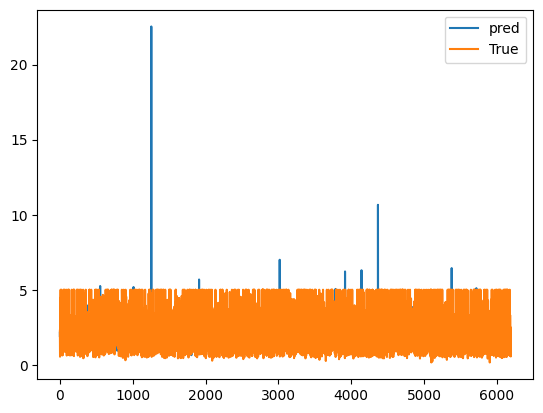

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

fit_train1 = sm.OLS(y_train, x_train)
fit_train1 = fit_train1.fit()

plt.plot(np.array(fit_train1.predict(x_test)),label='pred')
plt.plot(np.array(y_test), label='True')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
mse1 = mean_squared_error(y_true = y_test, y_pred = fit_train1.predict(x_test))
print(mse1)

1.4207801916412508


In [ ]:
Q1 = df_sp['Population'].quantile(0.25)
Q3 = df_sp['Population'].quantile(0.75)
IQR = Q3-Q1
rev_range = 4
filter1 = (df_sp['Population'] >= Q1 - rev_range*IQR) & (df_sp['Population'] <=Q3 + rev_range*IQR)

In [ ]:
df_sp_rmv = df_sp.loc[filter1]

In [ ]:
df_sp_rmv

,AveRooms,HouseAge,Population,AveOccup,target
0,6.984127,41.0,322.0,2.555556,4.526
1,6.238137,21.0,2401.0,2.109842,3.585
2,8.288136,52.0,496.0,2.802260,3.521
3,5.817352,52.0,558.0,2.547945,3.413
4,6.281853,52.0,565.0,2.181467,3.422
...,...,...,...,...,...
20635,5.045455,25.0,845.0,2.560606,0.781
20636,6.114035,18.0,356.0,3.122807,0.771
20637,5.205543,17.0,1007.0,2.325635,0.923
20638,5.329513,18.0,741.0,2.123209,0.847


In [ ]:
def replace(value):
    Q1 = df_sp['Population'].quantile(0.25)
    Q3 = df_sp['Population'].quantile(0.75)
    IQR = Q3-Q1
    rev_range = 4

    if((value <(Q1-rev_range*IQR))):
        value = np.nan
    if((value >(Q3+rev_range*IQR))):
        value = np.nan
    return value

df_sp['Population'] = df_sp['Population'].apply(replace_outlier)

<ipython-input-79-1652c2a12db7>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sp['Population'] = df_sp['Population'].apply(replace_outlier)


In [ ]:
df_sp.isna().sum()

AveRooms        0
HouseAge        0
Population    241
AveOccup        0
target          0
dtype: int64

In [ ]:
df_sp2=df_sp.dropna()

In [ ]:
df_sp2

,AveRooms,HouseAge,Population,AveOccup,target
0,6.984127,41.0,322.0,2.555556,4.526
1,6.238137,21.0,2401.0,2.109842,3.585
2,8.288136,52.0,496.0,2.802260,3.521
3,5.817352,52.0,558.0,2.547945,3.413
4,6.281853,52.0,565.0,2.181467,3.422
...,...,...,...,...,...
20635,5.045455,25.0,845.0,2.560606,0.781
20636,6.114035,18.0,356.0,3.122807,0.771
20637,5.205543,17.0,1007.0,2.325635,0.923
20638,5.329513,18.0,741.0,2.123209,0.847


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df_sp2.drop('target',axis=1), df_sp2['target'], test_size=0.3, random_state=111)

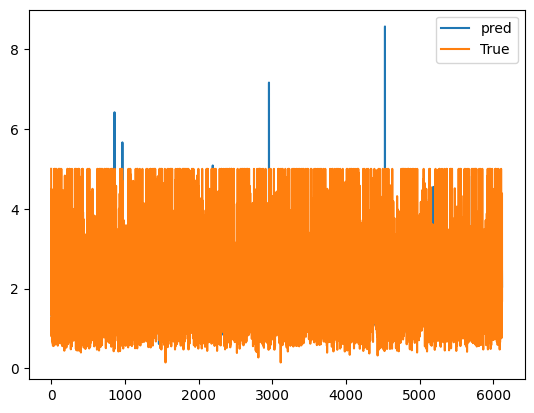

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

fit_train1 = sm.OLS(y_train, x_train)
fit_train1 = fit_train1.fit()

# 예측한 값
plt.plot(np.array(fit_train1.predict(x_test)),label='pred')
plt.plot(np.array(y_test), label='True')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
mse2 = mean_squared_error(y_true = y_test, y_pred = fit_train1.predict(x_test))
print(mse2)


1.309035258816392


In [ ]:
print(mse1)
print(mse2)

1.4207801916412508
1.309035258816392


In [ ]:
df_sp = df[['AveRooms', 'HouseAge','Population','AveOccup','target']]

In [ ]:
def saving(value):
    Q1 = df_sp['Population'].quantile(0.25)
    Q3 = df_sp['Population'].quantile(0.75)
    IQR = Q3-Q1
    rev_range = 4

    if((value < (Q1 - rev_range*IQR))):
        value = 1
    elif((value > (Q3 + rev_range*IQR))):
        value = 1
    else:
        value = 0
    return value

df_sp['Population_new'] = df_sp['Population'].apply(saving)

<ipython-input-88-b0b2e0c21632>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sp['Population_new'] = df_sp['Population'].apply(saving)


In [ ]:
df_sp.Population_new.sum()

241

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df_sp.drop('target',axis=1), df_sp['target'], test_size=0.3, random_state=111)

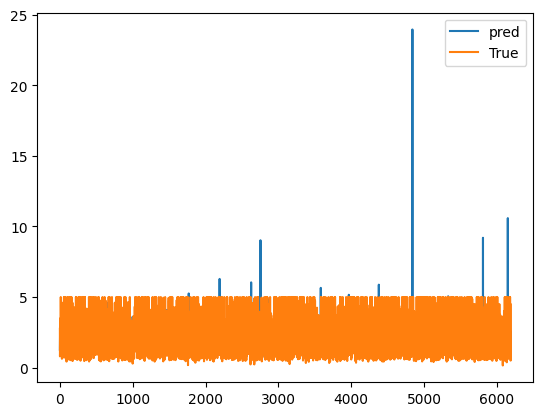

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

fit_train3 = sm.OLS(y_train, x_train)
fit_train3 = fit_train3.fit()

# 예측한 값
plt.plot(np.array(fit_train3.predict(x_test)),label='pred')
plt.plot(np.array(y_test), label='True')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
mse3 = mean_squared_error(y_true = y_test, y_pred = fit_train3.predict(x_test))
print(mse3)

1.366431592769318


In [ ]:
print(mse1,'base')
print(mse2,'이상치 제거')
print(mse3,'이상치 보존')

1.4207801916412508 base
1.309035258816392 이상치 제거
1.366431592769318 이상치 보존


In [ ]:
#실제로 mse값이 낮아진 것을 통해 앞선 feature의 선택 과정이 어느 정도 신뢰성이 있다는 것을 알 수 있었다.